## Import PyTorch

In [1]:
%pylab inline
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

Populating the interactive namespace from numpy and matplotlib


## Initialize Hyper-parameters

In [2]:
input_size = 784       # The image size = 28 x 28 = 784
hidden_size = 500      # The number of nodes at the hidden layer
num_classes = 10       # The number of output classes. In this case, from 0 to 9
num_epochs = 5         # The number of times entire dataset is trained
batch_size = 100       # The size of input data took for one iteration
learning_rate = 0.001  # The speed of convergence

## Download MNIST Dataset

In [3]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transform,
                           download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transform)

In [4]:
train_dataset[0]

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

## Load the Dataset

We shuffle the loading process of train_dataset to make the learning process independent of data orderness, but the order of test_loader remains to examine whether we can handle unspecified bias order of inputs.

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## Feedforward Neural Network Model Structure

In [7]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
        self.relu = nn.ReLU()                          # Non-Linear ReLU Layer: max(0,x)
    
    
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

## Instantiate the FNN

In [8]:
net = Net(input_size, hidden_size, num_classes)

In [9]:
a=net.parameters()
for i in a:
    print(i)

Parameter containing:
tensor([[ 0.0296, -0.0272,  0.0228,  ...,  0.0134,  0.0126,  0.0108],
        [-0.0247, -0.0070,  0.0005,  ..., -0.0240, -0.0092, -0.0204],
        [ 0.0304,  0.0337,  0.0348,  ..., -0.0294, -0.0074, -0.0203],
        ...,
        [-0.0178, -0.0179,  0.0204,  ...,  0.0127, -0.0245, -0.0010],
        [-0.0281,  0.0272, -0.0091,  ...,  0.0187,  0.0198,  0.0170],
        [ 0.0316, -0.0244,  0.0308,  ...,  0.0283, -0.0276,  0.0040]],
       requires_grad=True)
Parameter containing:
tensor([-0.0336, -0.0126,  0.0268, -0.0143,  0.0203, -0.0255,  0.0226, -0.0199,
        -0.0319, -0.0322,  0.0071, -0.0313,  0.0312,  0.0108,  0.0348,  0.0264,
         0.0040,  0.0287, -0.0186,  0.0242, -0.0066, -0.0252,  0.0128, -0.0174,
         0.0260,  0.0327, -0.0029,  0.0286, -0.0297, -0.0342,  0.0342, -0.0188,
        -0.0088, -0.0298, -0.0067,  0.0281,  0.0189,  0.0323,  0.0074,  0.0172,
        -0.0164, -0.0331, -0.0079, -0.0197, -0.0049,  0.0105,  0.0322, -0.0017,
         0.0312

## Choose the Loss Function and Optimizer

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [137]:
for i in net.parameters():
    print(i)


Parameter containing:
tensor([[-0.0077, -0.0129, -0.0203,  ..., -0.0071,  0.0048, -0.0113],
        [ 0.0221,  0.0278, -0.0158,  ..., -0.0030, -0.0351,  0.0140],
        [-0.0031, -0.0132, -0.0318,  ...,  0.0301,  0.0068,  0.0027],
        ...,
        [-0.0138, -0.0271,  0.0112,  ...,  0.0178, -0.0179, -0.0045],
        [ 0.0075, -0.0049, -0.0309,  ..., -0.0153, -0.0017,  0.0258],
        [-0.0199, -0.0189,  0.0356,  ...,  0.0145, -0.0321,  0.0105]],
       requires_grad=True)
Parameter containing:
tensor([-0.0197,  0.0056,  0.0133,  0.0271, -0.0103,  0.0226,  0.0043,  0.0167,
         0.0245, -0.0119,  0.0138, -0.0346,  0.0303, -0.0024,  0.0020,  0.0345,
         0.0302, -0.0020, -0.0247,  0.0289,  0.0246,  0.0018,  0.0145, -0.0038,
        -0.0336, -0.0269,  0.0186,  0.0357, -0.0038,  0.0312, -0.0349,  0.0294,
         0.0194,  0.0242, -0.0019, -0.0251, -0.0331,  0.0058,  0.0257, -0.0345,
        -0.0111, -0.0028, -0.0177, -0.0305,  0.0335,  0.0085,  0.0033,  0.0220,
         0.0290

## Train the FNN Model

In [11]:
losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = torch.FloatTensor(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = torch.LongTensor(labels)
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = net(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        losses.append(loss.data[0])
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
        if (i+1) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

/home/joshhu/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/home/joshhu/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/5], Step [100/600], Loss: 0.2110
Epoch [1/5], Step [200/600], Loss: 0.2499
Epoch [1/5], Step [300/600], Loss: 0.1495
Epoch [1/5], Step [400/600], Loss: 0.1820
Epoch [1/5], Step [500/600], Loss: 0.1330
Epoch [1/5], Step [600/600], Loss: 0.0339
Epoch [2/5], Step [100/600], Loss: 0.0674
Epoch [2/5], Step [200/600], Loss: 0.0801
Epoch [2/5], Step [300/600], Loss: 0.0382
Epoch [2/5], Step [400/600], Loss: 0.0579
Epoch [2/5], Step [500/600], Loss: 0.1993
Epoch [2/5], Step [600/600], Loss: 0.0531
Epoch [3/5], Step [100/600], Loss: 0.0366
Epoch [3/5], Step [200/600], Loss: 0.0244
Epoch [3/5], Step [300/600], Loss: 0.0703
Epoch [3/5], Step [400/600], Loss: 0.0592
Epoch [3/5], Step [500/600], Loss: 0.0342
Epoch [3/5], Step [600/600], Loss: 0.0595
Epoch [4/5], Step [100/600], Loss: 0.0089
Epoch [4/5], Step [200/600], Loss: 0.0266
Epoch [4/5], Step [300/600], Loss: 0.0509
Epoch [4/5], Step [400/600], Loss: 0.0214
Epoch [4/5], Step [500/600], Loss: 0.0876
Epoch [4/5], Step [600/600], Loss:

## Test the FNN Model

Similar to training the nerual network, we also need to load batches of test images and collect the outputs. The differences are that:
(1) No loss & weights calculation
(2) No wights update
(3) Has correct prediction calculation

In [12]:
correct = 0
total = 0
for images, labels in test_loader:
    images = torch.FloatTensor(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    total += labels.size(0)                    # Increment the total count
    correct += (predicted == labels).sum()     # Increment the correct count
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10K test images: 97 %


## Save the trained FNN Model for future use

In [13]:
# Save the model
torch.save(net.state_dict(), 'fnn_model.pkl')

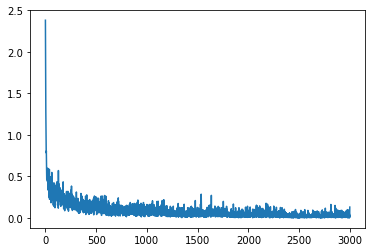

In [14]:
plot(losses)